In [1281]:
# data cleansing

In [1778]:
import pandas as pd
import numpy as np


# read in data
raw_chronic = pd.read_csv('LGA11_Chronic_Disease.csv', encoding = 'ISO-8859-1')

In [1779]:
# first, clean modelled estimate data

In [1780]:
# rename column headings for easier cleaning
lst = []
for i in raw_chronic.columns:
    i = i.lstrip()
    i = i.replace('_3_11_7_13', '')
    lst.append(i)
    
raw_chronic.columns = lst

In [1781]:
# delete unincorporated data
raw_chronic = raw_chronic[raw_chronic['area_name'] != 'Unincorporated Vic']


In [1782]:
del raw_chronic['area_name']

In [1783]:
# delete columns that contain high error data
raw_chronic
for i in raw_chronic.columns:
    if 'rrmse' in i:
        count = 0
        for j in raw_chronic[i]:
            if j != 3:
                count+=1
            if count >= 3:
                del raw_chronic[i]
                rate = i.replace('3_rrmse','2_rate')
                del raw_chronic[rate]
                break
            
for i in raw_chronic.columns:
    if 'rrmse' in i:
        del raw_chronic[i]


In [1784]:
# change column headings to human readable versions
chronic_df = raw_chronic.rename(columns={'area_code': 'LGA', 'mntl_bh_p_me_2_rate': 'Mental_and_Behavioural_Problems', 
                                         'hg_choles_me_2_rate': 'High_Cholesterol', 'asthma_me_2_rate': 'Asthma', 
                                         'respirtry_me_2_rate': 'Respiratory_System_Diseases', 'arthritis_me_2_rate': 'Arthritis', 
                                         'musculo_me_2_rate': 'Musculoskeletal_System_Diseases', 'hypertens_me_2_rate': 'Hypertension', 
                                         'circ_me_2_rate': 'Circulatory_System_Diseases'})
chronic_df = chronic_df[['LGA', 'Mental_and_Behavioural_Problems', 'High_Cholesterol', 'Asthma', 
                         'Respiratory_System_Diseases', 'Arthritis', 'Musculoskeletal_System_Diseases', 
                         'Hypertension', 'Circulatory_System_Diseases']]


In [1785]:
# clean survey data

In [1786]:
raw_visit_green = pd.read_csv('LGA_Visit_to_green_space.csv', encoding = 'ISO-8859-1')
raw_sleep = pd.read_csv('LGA_Inadequate_sleep.csv', encoding = 'ISO-8859-1')
raw_soft_drink = pd.read_csv('LGA_Daily_soft_drink_consumption.csv', encoding = 'ISO-8859-1')
raw_sedentary = pd.read_csv('LGA_Sedentary_behaviour.csv', encoding = 'ISO-8859-1')
raw_time_pressure = pd.read_csv('LGA_Time_pressure.csv', encoding = 'ISO-8859-1')
raw_wl_balance = pd.read_csv('LGA_Adequate_work-life_balance.csv', encoding = 'ISO-8859-1')

In [1787]:
def rename_survey(df, new_name):
    df.rename(columns = {' lga_code06': 'LGA', ' vic_ave': 'Average', 'numeric': new_name}, inplace = True)
    return None


In [1788]:
rename_survey(raw_sedentary, 'Sedentary_behaviour')
rename_survey(raw_sleep, 'Inadequate_sleep')
rename_survey(raw_soft_drink, 'Soft_drink_comsumption')
rename_survey(raw_visit_green, 'Visit_to_green_space')
rename_survey(raw_time_pressure, 'Time_pressure')
rename_survey(raw_wl_balance, 'Work_life_balance')

In [1789]:
# Crop outliers of the survey data
# Upper boundary of normal range is chosen as 3 IQR above the third quartile this range are outliers
# Suspected outliers are included in order to reasonably maximise sample size
# Lower boundary is selected by 3 IQR below the first quartile

In [1790]:
def crop_outlier(df, col_name):
    q3 = df[col_name].quantile(.75)
    q1 = df[col_name].quantile(.25)
    IQR = q3 - q1
    outlier = q3 + 1.5 * IQR
    outlier0 = q1 - 1.5 * IQR
    average = df['Average'][0]
    index = -1
    lst = []
    for i in df[col_name]:
        index += 1
        if i > outlier or i < outlier0:
            lst.append(index)
        else:
            next
    for i in lst:
        df.set_value(i, col_name, average)
    
    del df['Average']
    return None

In [1791]:
crop_outlier(raw_sedentary, 'Sedentary_behaviour')
crop_outlier(raw_sleep, 'Inadequate_sleep')
crop_outlier(raw_soft_drink, 'Soft_drink_comsumption')
crop_outlier(raw_visit_green, 'Visit_to_green_space')
crop_outlier(raw_time_pressure, 'Time_pressure')
crop_outlier(raw_wl_balance, 'Work_life_balance')

In [1792]:
# merge survey data into one condensed dataframe, remove duplicated columns

In [1793]:
survey_df = pd.concat([raw_visit_green, raw_time_pressure, raw_sedentary, raw_soft_drink, raw_wl_balance, raw_sleep], axis=1)
survey_df = survey_df.loc[:,~survey_df.columns.duplicated()]
survey_df = survey_df[['LGA', 'Visit_to_green_space', 'Time_pressure', 'Sedentary_behaviour',  'Soft_drink_comsumption', 
                     'Work_life_balance', 'Inadequate_sleep']]


In [1794]:
# clean income data

In [1795]:
raw_income = pd.read_csv('LGA_B17B_Personal_income.csv', encoding = 'ISO-8859-1')

In [1796]:
# discard all gender-related data

In [1797]:
lst = []
for i in raw_income.columns:
    i = i.lstrip()
    lst.append(i)

raw_income.columns = lst

for i in raw_income.columns:  
    if 'ns' in i:
        del raw_income[i]
    elif i[0] == 'F' or i[0] =='M':
        del raw_income[i]

In [1798]:
raw_income = raw_income[raw_income['LGA_NAME11'] != 'Unincorporated Vic']
del raw_income['LGA_NAME11']

In [1799]:
# discard all age related data

In [1800]:
for i in raw_income.columns:
    if i == 'LGA_MAIN11':
        next
    elif i[-3:] != 'Tot':
        del raw_income[i]

In [1801]:
raw_income.columns

Index(['P_1_199_Tot', 'P_Neg_Nil_income_Tot', 'P_600_799_Tot',
       'P_2000_more_Tot', 'P_200_299_Tot', 'P_Tot_Tot', 'P_1250_1499_Tot',
       'P_300_399_Tot', 'P_1000_1249_Tot', 'P_800_999_Tot', 'P_400_599_Tot',
       'P_1500_1999_Tot', 'LGA_MAIN11'],
      dtype='object')

In [1802]:
# merge income data into defined intervals, normalise row number data into percentage data

income_neg = 100 * raw_income['P_Neg_Nil_income_Tot'] / raw_income['P_Tot_Tot']

income_1_299 = 100 * (raw_income['P_1_199_Tot'] + raw_income['P_200_299_Tot']) / raw_income['P_Tot_Tot']

income_300_599 = 100 * (raw_income['P_300_399_Tot'] + raw_income['P_400_599_Tot']) / raw_income['P_Tot_Tot']

income_600_999 = 100 * (raw_income['P_600_799_Tot'] + raw_income['P_800_999_Tot']) / raw_income['P_Tot_Tot']

income_1000_1499 = 100 * (raw_income['P_1000_1249_Tot'] + raw_income['P_1250_1499_Tot']) / raw_income['P_Tot_Tot']

income_1500_1999 = 100 * raw_income['P_1500_1999_Tot'] / raw_income['P_Tot_Tot']

income_2000_ = 100* raw_income['P_2000_more_Tot'] / raw_income['P_Tot_Tot']

income_df = pd.DataFrame({'LGA': raw_income['LGA_MAIN11'], '< 0': income_neg, '1 ~ 299': income_100_299, 
                          '300 ~ 599': income_300_599, '600 ~ 999': income_600_999, '1000 ~ 1499': income_1000_1499, 
                          '1500 ~ 1999': income_1500_1999, '> 2000': income_2000_})

income_df = income_df[['LGA', '< 0', '1 ~ 299',  '300 ~ 599',  '600 ~ 999', '1000 ~ 1499',  '1500 ~ 1999',  '> 2000']]

In [1803]:
# Data cleasing is done


In [1804]:
# Second, use LGA codes to join datasets together and examine autocorrelation of data

In [1805]:
# join the three datasets together


chr_surv_df = chronic_df.join(survey_df.set_index('LGA'), on='LGA')
chr_inc_df = chronic_df.join(income_df.set_index('LGA'), on='LGA')
chr_surv_inc_df = chr_surv_df.join(income_df.set_index('LGA'), on='LGA')

del chronic_df['LGA']
del survey_df['LGA']
del income_df['LGA']

# these datasets are joined in the above way for future wrangling

In [1806]:
del chr_surv_df['LGA']


In [1807]:
del chr_inc_df['LGA']


In [1808]:
del chr_surv_inc_df['LGA']


In [1809]:
import matplotlib.pyplot as plt
import pylab
import numpy as np

from pandas.tools.plotting import lag_plot
from pandas.tools.plotting import autocorrelation_plot

%matplotlib inline



In [1810]:
# Draw lag plot and aucorrelation plot to measure autocorrelation

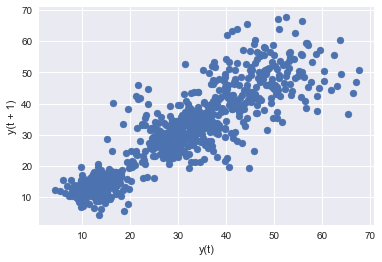

In [1811]:
lag_plot(chr_surv_df)


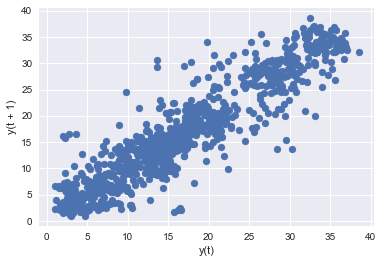

In [1812]:
lag_plot(chr_inc_df)

In [1813]:
# Autocorrelation step is done 
# The data is worth for further investigation

In [1814]:
# Third, calculate Pearson correlation of each pair of attributes

In [1817]:
def p_corr(df1, df2, size = 20):
    index = df2.columns
    columns = df1.columns
    corr_df = pd.DataFrame(index=index, columns=columns)
    corr = 0
    for i in df1:
        lst = []
        for j in df2:
            corr = df1[i].corr(df2[j])
            lst.append(corr)
        corr_df[i] = lst
    return corr_df

In [1818]:
import numpy as np
import seaborn as sns

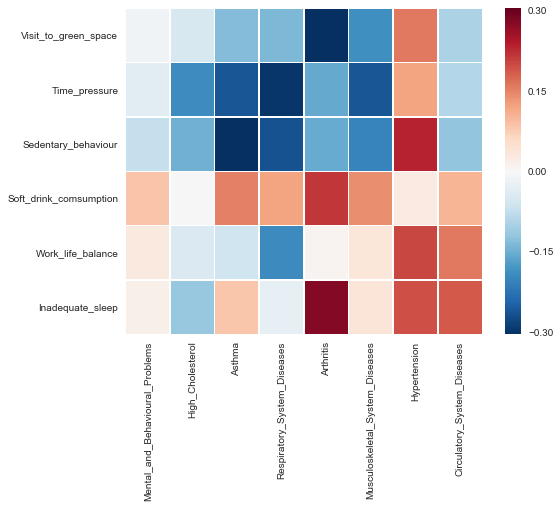

In [1819]:
# Pearson correlation of pairs of variables from chronic disease data and survey data
fig, ax = plt.subplots(figsize=(8, 6))   
sns.heatmap(p_corr(chronic_df, survey_df), linewidths=.5, ax=ax)

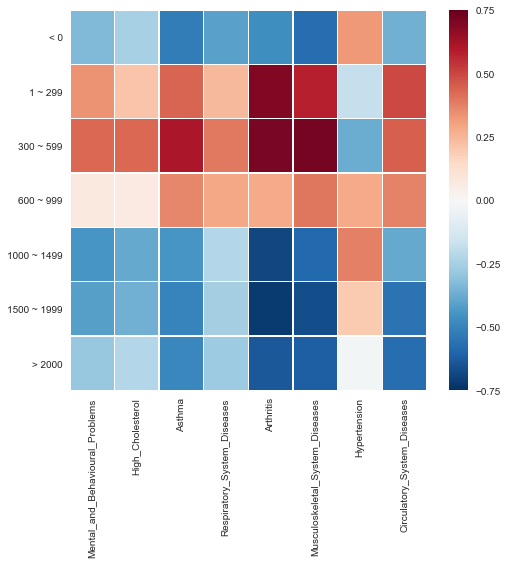

In [1839]:
# Pearson correlation of pairs of variables from chronic disease data and income data
fig, ax = plt.subplots(figsize=(8, 7))   
sns.heatmap(p_corr(chronic_df, income_df), vmin = -0.75, vmax = 0.75, linewidths =.5, ax=ax)

# despite people with negative income, people with lower weekly income generally have greater chance of 
# getting chronic disease

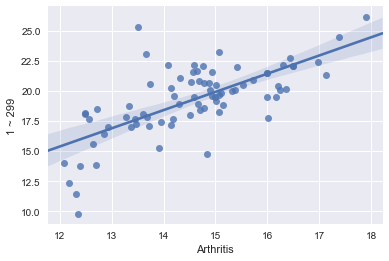

In [1846]:
x = chronic_df['Arthritis']
y = income_df['1 ~ 299']
sns.regplot(x, y)


0.711133337564


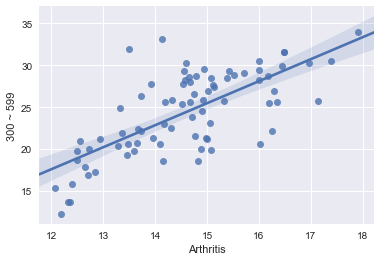

In [1850]:
x = chronic_df['Arthritis']
y = income_df['300 ~ 599']
sns.regplot(x, y)

corr = chronic_df['Arthritis'].corr(income_df['300 ~ 599']) 
print(corr)

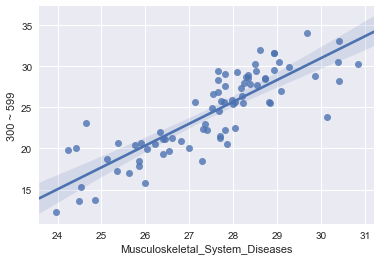

In [1842]:
x = chronic_df['Musculoskeletal_System_Diseases']
y = income_df['300 ~ 599']
sns.regplot(x = 'Musculoskeletal_System_Diseases', y = '300 ~ 599', data = chr_inc_df)


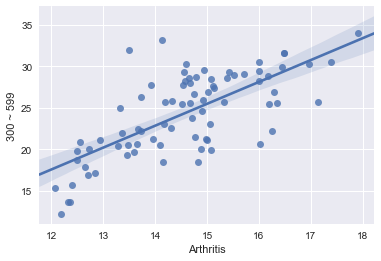

In [1843]:
x = chronic_df['Arthritis']
y = income_df['300 ~ 599']
sns.regplot(x,y)


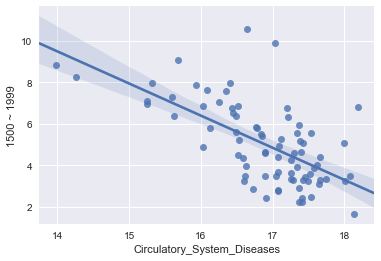

In [1844]:
x = chronic_df['Circulatory_System_Diseases']
y = income_df['1500 ~ 1999']
sns.regplot(x = 'Circulatory_System_Diseases', y = '1500 ~ 1999', data = chr_inc_df)


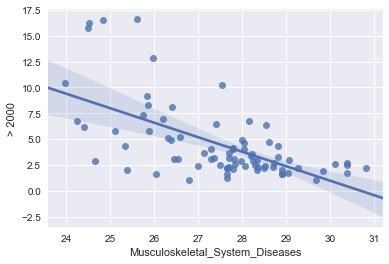

In [1845]:
x = chronic_df['Musculoskeletal_System_Diseases']
y = income_df['> 2000']
sns.regplot(x, y)


In [ ]:
# In conclusion, while choosing appropriate dataset is the key, the approaches used to manipulate 
# and wrangle the data are more important; different approach provides different viewpoints and subsequently alters 
# the outcome of visualisation and analysis.
